In [500]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [501]:
df = pd.read_excel("./alldata.xlsx")

In [502]:
print(df)

           Date    Price     Open     High      Low   Vol.  Change %  \
0    2010-07-18      0.1      0.0      0.1      0.1   0.08      0.00   
1    2010-07-19      0.1      0.1      0.1      0.1   0.57      0.00   
2    2010-07-20      0.1      0.1      0.1      0.1   0.26      0.00   
3    2010-07-21      0.1      0.1      0.1      0.1   0.58      0.00   
4    2010-07-22      0.1      0.1      0.1      0.1   2.16      0.00   
...         ...      ...      ...      ...      ...    ...       ...   
4932 2024-01-18  41292.7  42763.5  42908.0  40682.6  70.35     -3.45   
4933 2024-01-19  41648.0  41293.8  42164.6  40305.4  72.64      0.86   
4934 2024-01-20  41695.4  41647.6  41858.0  41449.5  22.27      0.11   
4935 2024-01-21  41583.2  41695.4  41878.0  41504.5  16.11     -0.27   
4936 2024-01-22  39556.4  41581.7  41684.9  39468.4  85.05     -4.87   

      FEDFUNDS       Gold  
0         0.18  1204.7500  
1         0.18  1190.2500  
2         0.18  1181.5000  
3         0.18  1191.25

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4937 non-null   datetime64[ns]
 1   Price     4937 non-null   float64       
 2   Open      4937 non-null   float64       
 3   High      4937 non-null   float64       
 4   Low       4937 non-null   float64       
 5   Vol.      4937 non-null   float64       
 6   Change %  4937 non-null   float64       
 7   FEDFUNDS  4937 non-null   float64       
 8   Gold      4937 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 347.3 KB


In [504]:
null_rows = df[df.isnull().any(axis=1)]

# Hiển thị kết quả
print("Các hàng có giá trị null:")
print(null_rows)

Các hàng có giá trị null:
Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %, FEDFUNDS, Gold]
Index: []


<Axes: >

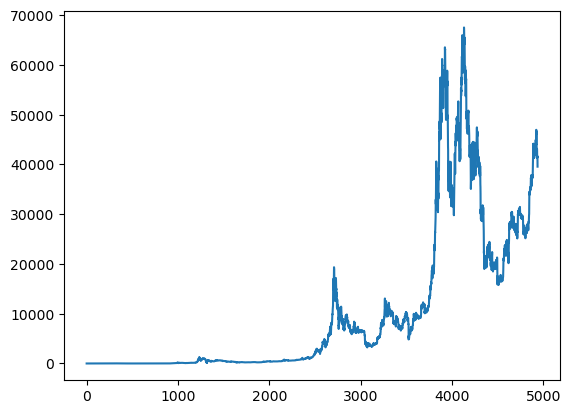

In [505]:
df['Price'].plot()

In [506]:
df_demo = df.iloc[4907:]
df_train = df.iloc[:4907]

print(df_train.shape)

print(df_demo.shape)

(4907, 9)
(30, 9)


In [507]:
output = pd.DataFrame(df_train['Price'])
features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'FEDFUNDS', 'Gold']

In [508]:
"""from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
print(feature_transform)"""

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nfeature_transform = scaler.fit_transform(df[features])\nfeature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)\nprint(feature_transform)'

In [509]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=30)
for train_index, test_index in timesplit.split(df_train[features]):
        X_train, X_test = df_train[features][:len(train_index)], df_train[features][len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [510]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [511]:
X_demo = df_demo[['Open', 'High', 'Low', 'Vol.', 'Change %', 'FEDFUNDS', 'Gold']]
y_demo = df_demo['Price']

In [512]:
demoX = np.array(X_demo)
X_demo = demoX.reshape(X_demo.shape[0], 1, X_demo.shape[1])

In [513]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_percentage_error', optimizer='adam')
lstm.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 50)                11600     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11651 (45.51 KB)
Trainable params: 11651 (45.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [514]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=2, verbose=1, shuffle=False)

Epoch 1/100


2375/2375 [==============================] - 5s 1ms/step - loss: 185.0559
Epoch 2/100
2375/2375 [==============================] - 3s 1ms/step - loss: 92.5496
Epoch 3/100
2375/2375 [==============================] - 3s 1ms/step - loss: 31.3689
Epoch 4/100
2375/2375 [==============================] - 3s 1ms/step - loss: 17.4570
Epoch 5/100
2375/2375 [==============================] - 4s 2ms/step - loss: 27.4226
Epoch 6/100
2375/2375 [==============================] - 3s 1ms/step - loss: 22.5354
Epoch 7/100
2375/2375 [==============================] - 4s 1ms/step - loss: 20.2690
Epoch 8/100
2375/2375 [==============================] - 3s 1ms/step - loss: 15.1053
Epoch 9/100
2375/2375 [==============================] - 3s 1ms/step - loss: 23.9795
Epoch 10/100
2375/2375 [==============================] - 3s 1ms/step - loss: 30.5803
Epoch 11/100
2375/2375 [==============================] - 3s 1ms/step - loss: 20.0326
Epoch 12/100
2375/2375 [==============================] - 3s 1ms/step - lo

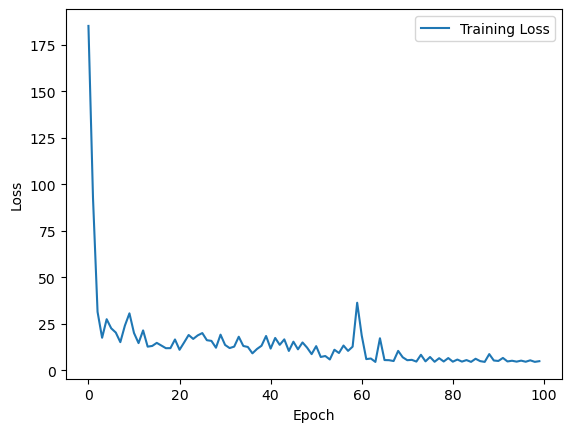

In [515]:
# In biểu đồ sự tiến triển của mô hình
import matplotlib.pyplot as plt
    
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [516]:
y_pred= lstm.predict(X_test)

5/5 [==============================] - 0s 2ms/step


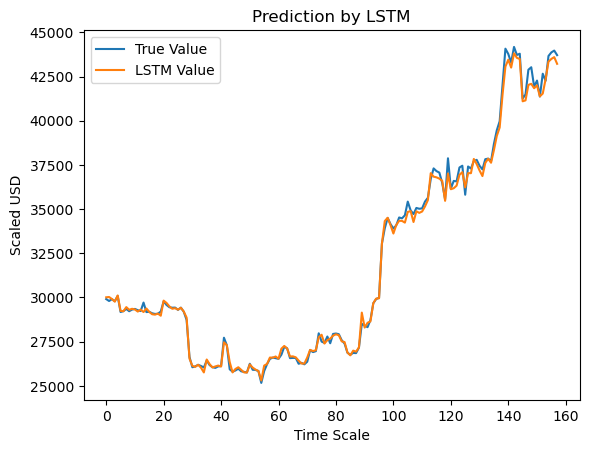

In [517]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [518]:
mse = mean_squared_error(y_test,y_pred, squared=True)
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MSE = ", mse)
print("MAPE = ", mape)

MSE =  74359.44222790781
MAPE =  0.005250072511712975


In [519]:
y_pred_demo = lstm.predict(X_demo)
y_pred_demo

1/1 [==============================] - 0s 20ms/step


array([[42879.457],
       [43081.55 ],
       [42082.42 ],
       [42783.91 ],
       [42584.355],
       [41893.324],
       [41782.14 ],
       [42236.81 ],
       [43298.773],
       [45000.48 ],
       [42283.098],
       [43728.332],
       [42938.676],
       [43360.67 ],
       [43743.52 ],
       [45476.664],
       [46086.895],
       [45680.465],
       [47121.164],
       [43059.45 ],
       [42544.56 ],
       [41923.04 ],
       [42550.254],
       [42662.203],
       [42227.465],
       [41149.582],
       [40982.094],
       [41366.742],
       [41391.656],
       [39922.7  ]], dtype=float32)